In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv("/kaggle/input/google-stock-data/GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


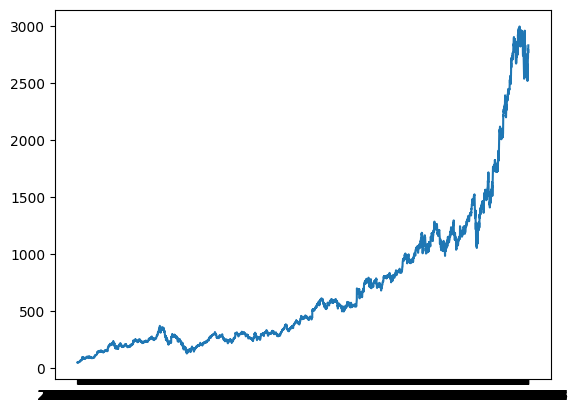

In [3]:
plt.plot(df['Date'], df['Close'])

In [6]:
data = df.loc[:, 'Close'].values
train_data = data[:len(data)-50]
test_data = data[len(train_data):]
train_data = train_data.reshape(train_data.shape[0],1)
test_data = test_data.reshape(test_data.shape[0],1)

In [7]:
train_data.shape, test_data.shape

((4381, 1), (50, 1))

In [8]:
train_data

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [2740.340088],
       [2773.389893],
       [2794.719971]])

In [9]:
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train_data)

In [10]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [11]:
X_train.shape

(4331, 50, 1)

## RNN

In [89]:
model = Sequential()
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2)) 

# model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
# model.add(Dropout(0.2))

# model.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
# model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [90]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
136/136 [==============================] - 12s 74ms/step - loss: 0.0299 - mae: 0.1067
Epoch 2/10
136/136 [==============================] - 10s 75ms/step - loss: 0.0059 - mae: 0.0478
Epoch 3/10
136/136 [==============================] - 10s 73ms/step - loss: 0.0035 - mae: 0.0367
Epoch 4/10
136/136 [==============================] - 10s 73ms/step - loss: 0.0026 - mae: 0.0302
Epoch 5/10
136/136 [==============================] - 10s 75ms/step - loss: 0.0022 - mae: 0.0277
Epoch 6/10
136/136 [==============================] - 10s 74ms/step - loss: 0.0020 - mae: 0.0262
Epoch 7/10
136/136 [==============================] - 10s 72ms/step - loss: 0.0016 - mae: 0.0234
Epoch 8/10
136/136 [==============================] - 10s 73ms/step - loss: 0.0015 - mae: 0.0226
Epoch 9/10
136/136 [==============================] - 10s 73ms/step - loss: 0.0014 - mae: 0.0218
Epoch 10/10
136/136 [==============================] - 10s 74ms/step - loss: 0.0012 - mae: 0.0209


In [91]:
inputs = scaler.transform(test_data)

In [92]:
inputs.shape

(50, 1)

In [93]:
X_test.shape

(1, 50, 0)

In [94]:
predicted_data=model.predict(inputs)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 3ms/step


In [95]:
predicted_data

array([[1556.8944],
       [1531.0054],
       [1539.1527],
       [1507.3346],
       [1499.2537],
       [1482.6371],
       [1455.3883],
       [1459.5673],
       [1423.7479],
       [1445.0469],
       [1442.9371],
       [1483.0371],
       [1500.969 ],
       [1522.3945],
       [1616.264 ],
       [1571.9504],
       [1573.7893],
       [1536.6051],
       [1538.4099],
       [1558.3615],
       [1531.3064],
       [1491.5985],
       [1503.0088],
       [1512.9247],
       [1523.2534],
       [1475.5643],
       [1455.8639],
       [1450.4161],
       [1429.8075],
       [1476.9639],
       [1493.2242],
       [1498.708 ],
       [1489.5685],
       [1494.2522],
       [1488.08  ],
       [1469.7372],
       [1418.5795],
       [1425.3214],
       [1483.6716],
       [1474.556 ],
       [1450.9432],
       [1414.6062],
       [1444.7233],
       [1482.3888],
       [1487.5239],
       [1508.5024],
       [1508.2826],
       [1542.6826],
       [1528.1624],
       [1558.1796]],

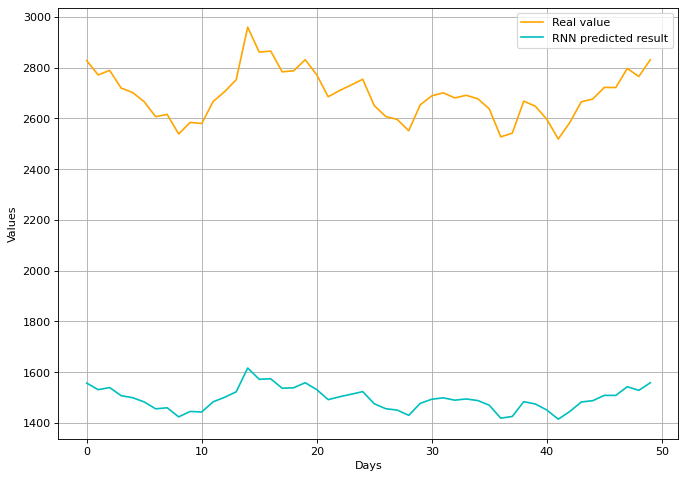

In [96]:
plt.figure(figsize=(10,7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="orange",label="Real value")
plt.plot(predicted_data, color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## LSTM

In [39]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))

In [40]:
model.compile(loss="mean_squared_error",optimizer='Adam', metrics=['mae'])
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
4331/4331 [==============================] - 19s 4ms/step - loss: 0.0032 - mae: 0.0192
Epoch 2/50
4331/4331 [==============================] - 17s 4ms/step - loss: 1.3688e-04 - mae: 0.0081
Epoch 3/50
4331/4331 [==============================] - 17s 4ms/step - loss: 1.0358e-04 - mae: 0.0068
Epoch 4/50
4331/4331 [==============================] - 17s 4ms/step - loss: 7.9749e-05 - mae: 0.0060
Epoch 5/50
4331/4331 [==============================] - 17s 4ms/step - loss: 7.1064e-05 - mae: 0.0057
Epoch 6/50
4331/4331 [==============================] - 17s 4ms/step - loss: 6.3181e-05 - mae: 0.0053
Epoch 7/50
4331/4331 [==============================] - 17s 4ms/step - loss: 5.7271e-05 - mae: 0.0049
Epoch 8/50
4331/4331 [==============================] - 17s 4ms/step - loss: 4.9266e-05 - mae: 0.0046
Epoch 9/50
4331/4331 [==============================] - 17s 4ms/step - loss: 4.4512e-05 - mae: 0.0044
Epoch 10/50
4331/4331 [==============================] - 17s 4ms/step - loss: 4.5495e-

In [41]:
inputs = scaler.transform(test_data)

In [42]:
predicted_data=model.predict(inputs)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 3ms/step


In [43]:
predicted_data

array([[2743.6887],
       [2692.236 ],
       [2708.46  ],
       [2644.9402],
       [2628.742 ],
       [2595.3506],
       [2540.3672],
       [2548.8174],
       [2476.1917],
       [2519.4297],
       [2515.153 ],
       [2596.1558],
       [2632.1824],
       [2675.0583],
       [2860.5154],
       [2773.4731],
       [2777.104 ],
       [2703.3904],
       [2706.9822],
       [2746.5952],
       [2692.836 ],
       [2613.3726],
       [2636.2725],
       [2656.1309],
       [2676.773 ],
       [2581.1057],
       [2541.3296],
       [2530.3052],
       [2488.508 ],
       [2583.9258],
       [2616.6377],
       [2627.6465],
       [2609.2925],
       [2618.703 ],
       [2606.2998],
       [2569.3552],
       [2465.6768],
       [2479.391 ],
       [2597.433 ],
       [2579.0732],
       [2531.372 ],
       [2457.588 ],
       [2518.7737],
       [2594.8508],
       [2605.182 ],
       [2647.2793],
       [2646.8394],
       [2715.4802],
       [2686.5679],
       [2746.235 ]],

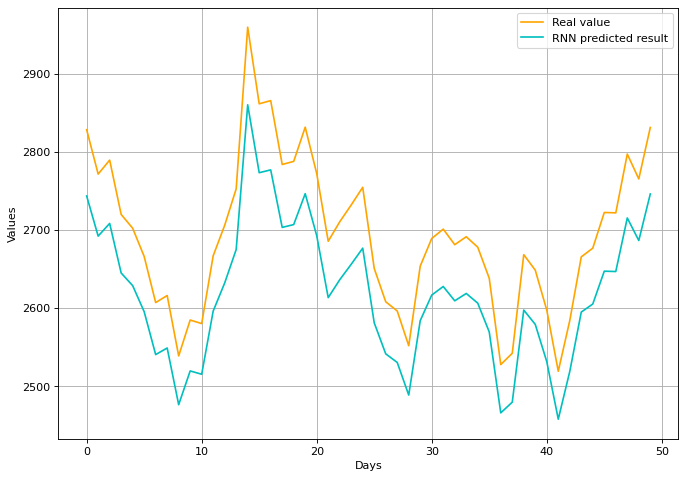

In [44]:
plt.figure(figsize=(10,7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="orange",label="Real value")
plt.plot(predicted_data, color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()